Name: Hanish Sai Rohit
Ph no: 8332082623
Email id : hanishsidhu@gmail.com
Email id : hanishrohit@gmail.com

In [296]:
from sklearn.datasets import load_boston
boston = load_boston()

In [297]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [298]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [299]:
import sklearn.cross_validation
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [300]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [301]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Scikit-learn Implementation

In [302]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lm = LinearRegression()
lm.fit(X_train, Y_train)

pred_sklearn = lm.predict(X_test)

# Stochastic Gradient Descent Implementation

In [354]:
import numpy as np

class Stochastic_Gradient_Descent:
    
     # a function to calculate partial derivative of weights           
    def partial_derivative_of_weights(self,weight,intercept,train_X,train_Y):
        xw = np.matmul(train_X,weight)
        xwi = xw + intercept
        result = np.subtract(xwi,train_Y)
        result = np.matmul(train_X.T,result)
        result = np.multiply(2,result)
        partial_der = result
        return partial_der
    
     # a function to calculate partial derivative of intercept
    def partial_derivative_of_intercept(self,weight,intercept,trainn_X,trainn_Y):
        
        xw = np.matmul(trainn_X,weight)
        xwi = xw + intercept
        result = np.subtract(xwi,trainn_Y)
        result = np.multiply(2,result)
        sum_of_elements = np.sum(result)
        partial_der_intercept = sum_of_elements
        return partial_der_intercept
    
    # a function to calculate squared loss for a given weight vector and intercept
    def calculate_loss(self,weight,trainnn_X,trainnn_Y,intercept):
        los = np.matmul(trainnn_X,weight)
        los = los + intercept
        los = np.subtract(los,trainnn_Y)
        los = np.matmul(los.T,los)
        return los
      
    def fit(self,x,y):
        
        trainx = x
        trainy = y
        weight_of_vector = len(trainx.columns)
        
        X = np.asarray(trainx)
        Y = np.asarray([trainy,])
        Y = Y.T
        
        # creating  a random weight vector
        weight =[]
        for w in range(0,weight_of_vector):
            rand = np.random.normal(0,0.0001)
            rand = np.asarray([rand,])
            weight.append(rand)
            
        weight = np.asarray(weight)
        
        r = 1e-5  # learning rate
        b = np.random.normal(0,10)
        count = 0  # count to calculate number of iterations
        
        # calculating squared loss for the random weights and intercept values.
        loss = self.calculate_loss(weight,X,Y,b) 
        
        
        while True :
            Y= pd.DataFrame(np.array([trainy,]).T,columns=['PRICE'])
            X= pd.DataFrame(np.array(trainx))
            dataset = pd.concat([X,Y],axis = 1) # concatenating X,Y to sample the dataset
            dataset = dataset.sample(150)     # sampling the dataset
            Y= pd.DataFrame(np.array(dataset['PRICE']),columns=['PRICE'])
            X = dataset.drop(labels=['PRICE'],axis =1)
            X = pd.DataFrame(np.array(X))
            X = np.asarray(X)
            Y = np.asarray(Y)            
            
            # calculating new weights
            term = self.partial_derivative_of_weights(weight,b,X,Y)            
            term = np.multiply(r,term)
            term = np.subtract(weight,term)
            new_weight = term
            
            # calculating new intercept
            term2 = self.partial_derivative_of_intercept(weight,b,X,Y)
            term2 = np.multiply(r,term2)
            term2 = np.subtract(b,term2)
            new_intercept = term2
            
            # calculating new squared loss for the updated weights and intercept values.
            new_loss = self.calculate_loss(new_weight,X,Y,new_intercept)
            
            # threshold to stop the iterations 
            threshold = np.absolute(loss - new_loss)
            loss = new_loss
            
            count = count + 1 # to count number of iterations
            
            
            r = r
            b = new_intercept
            weight = new_weight
            
            
            if threshold <1.01:
                r = r/1.4  # to take smaller steps
            
            
            if threshold < 0.1 :
                self.intercept_ = new_intercept
                self.coef_ = new_weight
                self.n_iter_ =  count
                break
            
    def predict(self,testing_data):
        pred_y = np.matmul(testing_data,self.coef_)
        pred_y = pred_y + self.intercept_
        return pred_y
    
sgd = Stochastic_Gradient_Descent()
sgd.fit(X_train,Y_train)
pred_sgd = sgd.predict(X_test)


# Gradient Descent Implementation

In [355]:
import numpy as np

class Gradient_Descent:
    
     # a function to calculate partial derivative of weights           
    def partial_derivative_of_weights(self,weight,intercept,train_X,train_Y):
        xw = np.matmul(train_X,weight)
        xwi = xw + intercept
        result = np.subtract(xwi,train_Y)
        result = np.matmul(train_X.T,result)
        result = np.multiply(2,result)
        partial_der = result
        return partial_der
    
     # a function to calculate partial derivative of intercept
    def partial_derivative_of_intercept(self,weight,intercept,trainn_X,trainn_Y):
        
        xw = np.matmul(trainn_X,weight)
        xwi = xw + intercept
        result = np.subtract(xwi,trainn_Y)
        result = np.multiply(2,result)
        sum_of_elements = np.sum(result)
        partial_der_intercept = sum_of_elements
        return partial_der_intercept
    
    # a function to calculate squared loss for a given weight vector and intercept
    def calculate_loss(self,weight,trainnn_X,trainnn_Y,intercept):
        los = np.matmul(trainnn_X,weight)
        los = los + intercept
        los = np.subtract(los,trainnn_Y)
        los = np.matmul(los.T,los)
        return los
      
    def fit(self,x,y):
        
        trainx = x
        trainy = y
        weight_of_vector = len(trainx.columns)
        
        X = np.asarray(trainx)
        Y = np.asarray([trainy,])
        Y = Y.T
        
        # creating  a random weight vector
        weight =[]
        for w in range(0,weight_of_vector):
            rand = np.random.normal(0,0.0001)
            rand = np.asarray([rand,])
            weight.append(rand)
            
        weight = np.asarray(weight)
        
        r = 1e-5  # learning rate
        b = np.random.normal(0,10)
        count = 0  # count to calculate number of iterations
        
        # calculating squared loss for the random weights and intercept values.
        loss = self.calculate_loss(weight,X,Y,b) 
        
        
        for hj in range(0,10000) :
                       
            # calculating new weights
            term = self.partial_derivative_of_weights(weight,b,X,Y)            
            term = np.multiply(r,term)
            term = np.subtract(weight,term)
            new_weight = term
            
            # calculating new intercept
            term2 = self.partial_derivative_of_intercept(weight,b,X,Y)
            term2 = np.multiply(r,term2)
            term2 = np.subtract(b,term2)
            new_intercept = term2
            
            # calculating new squared loss for the updated weights and intercept values.
            new_loss = self.calculate_loss(new_weight,X,Y,new_intercept)
            
            # threshold to stop the iterations 
            threshold = np.absolute(loss - new_loss)
            loss = new_loss
            
            count = count + 1 # to count number of iterations
                        
            r = r
            b = new_intercept
            weight = new_weight
               
            
            if threshold < 0.001 :
                self.intercept_ = new_intercept
                self.coef_ = new_weight
                self.n_iter_ =  count
                break
            
    def predict(self,testing_data):
        pred_y = np.matmul(testing_data,self.coef_)
        pred_y = pred_y + self.intercept_
        return pred_y
    
gd = Gradient_Descent()
gd.fit(X_train,Y_train)
pred_gd = gd.predict(X_test)

## Similarity of all the three implementations

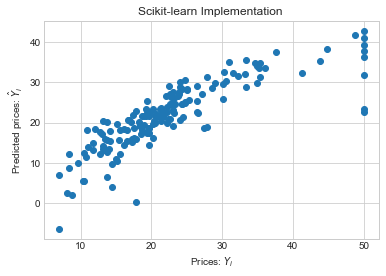

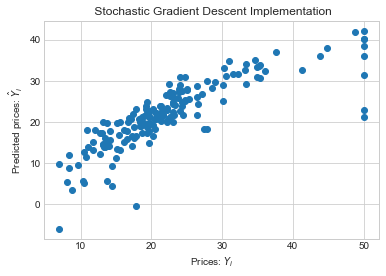

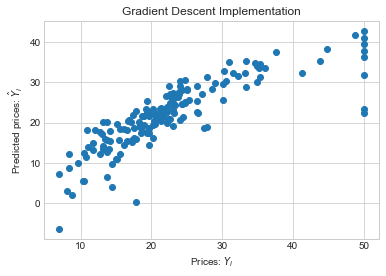

In [356]:
import matplotlib.pyplot as plt

plt.figure(1)

plt.scatter(Y_test, pred_sklearn)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Scikit-learn Implementation ")
plt.show()

plt.figure(2)
plt.scatter(Y_test, pred_sgd)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title(" Stochastic Gradient Descent Implementation")
plt.show()

plt.figure(3)
plt.scatter(Y_test, pred_gd)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Gradient Descent Implementation")

plt.show()


observation:
    *  All the three scatter plots looks almost same.

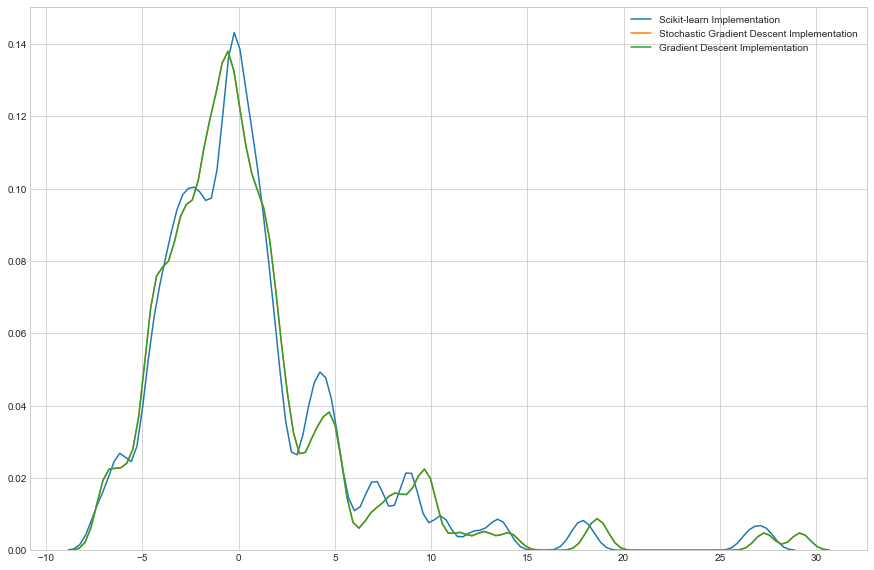

In [357]:
import seaborn as sns
import numpy as np


plt.figure(1,figsize=[15,10])

delta_y = Y_test - pred_sklearn;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5,label='Scikit-learn Implementation')

pred_sgd_ = pred_y.transpose()
pred_sgd_ = pred_sgd_[0]

delta_y = Y_test - pred_sgd_;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5,label='Stochastic Gradient Descent Implementation')

pred_gd_ = pred_y.transpose()
pred_gd_ = pred_gd_[0]

delta_y = Y_test - pred_gd_;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5,label='Gradient Descent Implementation')
plt.legend()
plt.show()

observation:
    * Test data error distribution for all the three implementations are almost same.

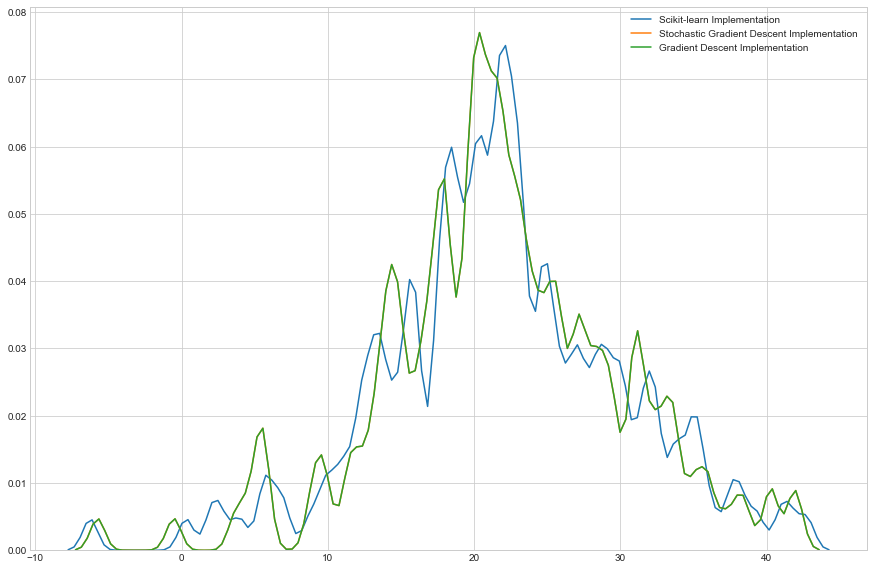

In [358]:
import seaborn as sns
import numpy as np


plt.figure(1,figsize=[15,10])

sns.set_style('whitegrid')

sns.kdeplot(np.array(pred_sklearn), bw=0.5,label='Scikit-learn Implementation')

sns.kdeplot(np.array(pred_sgd_), bw=0.5,label='Stochastic Gradient Descent Implementation')

sns.kdeplot(np.array(pred_gd_), bw=0.5,label='Gradient Descent Implementation')

plt.legend()

plt.show()

observation:
    * predicted price pdf's for all the three implementations are almost same.

In [361]:
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

sklearn_mse = mean_squared_error(Y_test,pred_sklearn)
sgd_mse = mean_squared_error(Y_test,pred_sgd)
gd_mse = mean_squared_error(Y_test,pred_gd)
                            
sklearn_r2 = r2_score(Y_test,pred_sklearn)
sgd_r2 = r2_score(Y_test,pred_sgd)
gd_r2 = r2_score(Y_test,pred_gd)

x = PrettyTable()

x.field_names = [" ","Scikit-learn implementation"," Gradient Descent","Stochastic Gradient Descent",]


x.add_row(["Mean Squared Error\n",sklearn_mse,gd_mse,sgd_mse])
x.add_row(["R2_Score\n",sklearn_r2,gd_r2,sgd_r2]) 

x.add_row(["Intercept value\n",lm.intercept_,gd.intercept_,sgd.intercept_])


features =boston.feature_names
sklearn_weights = lm.coef_
sgd_weights = sgd.coef_
gd_weights = gd.coef_


for i in range(0,13):
    strr = str(features[i]) + " feature's weight\n"
    x.add_row([strr,np.round(sklearn_weights[i],decimals=3),np.round(gd_weights[i][0],decimals=3),np.round(sgd_weights[i][0],decimals=3)])


print(x)
print( " * Batch size of Stochastic Gradient Descent is 150")
                            

+--------------------------+-----------------------------+--------------------+-----------------------------+
|                          | Scikit-learn implementation |  Gradient Descent  | Stochastic Gradient Descent |
+--------------------------+-----------------------------+--------------------+-----------------------------+
|    Mean Squared Error    |      28.541367275618263     | 28.508234880871253 |      29.11272209788439      |
|                          |                             |                    |                             |
|         R2_Score         |      0.6955388005506418     | 0.6958922359186075 |      0.6894439497742768     |
|                          |                             |                    |                             |
|     Intercept value      |      22.537168141592925     | 22.537168141592662 |      22.51753125430693      |
|                          |                             |                    |                             |
|  CRIM fe

-----------------------------------------------THE END------------------------------------------------------------